# Example 03: General Use of GLMNetCVClassifier
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slickml/slick-ml/blob/master/examples/classification/example_03_GLMNetCVClassifier.ipynb)

### Google Colab Configuration

In [1]:
# !git clone https://github.com/slickml/slick-ml.git
# %cd slick-ml
# !pip install -r requirements.txt

### Local Environment Configuration

In [1]:
# Change path to project root
%cd ../..

/home/amirhessam/Documents/GitHub/slick-ml


### Import Python Libraries

In [2]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
%autoreload
from slickml.classification import GLMNetCVClassifier

-----
# GLMNetCVClassifier Docstring

In [37]:
help(GLMNetCVClassifier)

Help on class GLMNetCVClassifier in module slickml.classification:

class GLMNetCVClassifier(builtins.object)
 |  GLMNetCVClassifier(alpha=None, n_lambda=None, n_splits=None, metric=None, scale=True, sparse_matrix=False, fit_intercept=True, cut_point=None, min_lambda_ratio=None, lambda_path=None, tol=None, max_iter=None, random_state=None, max_features=None)
 |  
 |  GLMNet CV Classifier.
 |  This is wrapper using GLM-Net to train a Regularized Linear Model
 |  via logitic regression and find the optimal penalty values through
 |  N-Folds cross validation. This function is pretty useful to train
 |  a Logit-Net model with the ability of feature reduction. Main
 |  theoretical reference:
 |  (https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html)
 |  
 |  Parameters
 |  ----------
 |  alpha: float, optional (default=0.5)
 |      The stability parameter, 0 <= alpha <= 1: 0.0 for Ridge, 1.0 for LASSO
 |  
 |  n_lambda: int, optional (default=100)
 |      Maximum number of lambda value

## Example

In [38]:
# loading data
df = pd.read_csv("data/clf_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [39]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [41]:
# train a model
clf = GLMNetCVClassifier(alpha=0.3, 
                         n_splits=4, 
                         metric="roc_auc")
clf.fit(X_train, y_train)

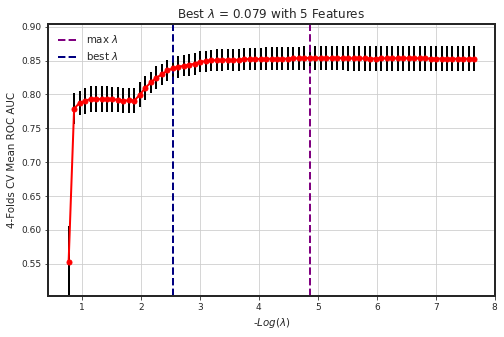

In [42]:
# plot cv_results 
clf.plot_cv_results() 

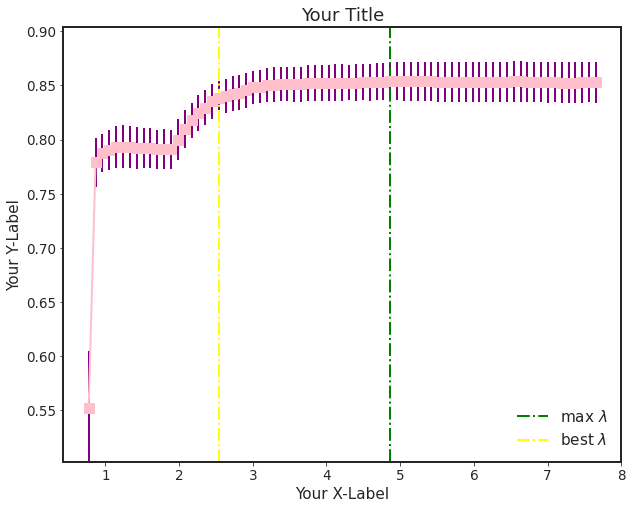

In [43]:
# plot cv_results -> you can customize it
clf.plot_cv_results(figsize=(10, 8),
                    marker="s",
                    markersize=10,
                    colors=["pink", "purple", "green", "yellow"],
                    linestyle="-.",
                    fontsize=18,
                    grid=False,
                    legend=True,
                    legendloc=4,
                    xlabel="Your X-Label",
                    ylabel="Your Y-Label",
                    title="Your Title",
                    save_path=None)

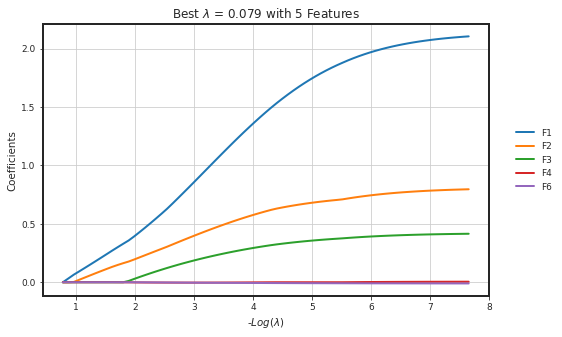

In [44]:
# plot coeff_paths
clf.plot_coeff_path()

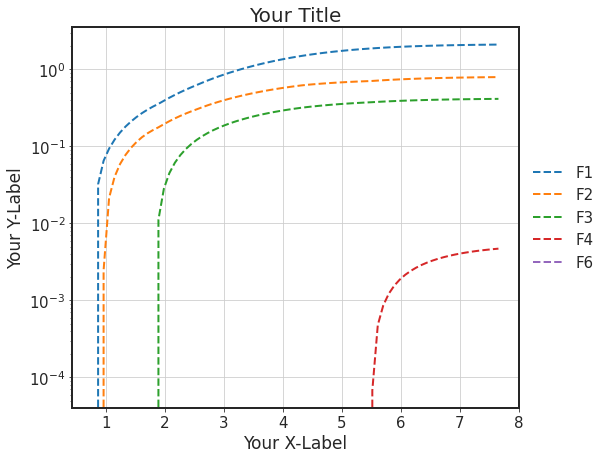

In [45]:
# plot coeff_paths
clf.plot_coeff_path(figsize=(8,7),
                    linestyle="--",
                    fontsize=20,
                    grid=False,
                    legend=True,
                    legendloc='center',
                    xlabel="Your X-Label",
                    ylabel="Your Y-Label",
                    title="Your Title",
                    bbox_to_anchor=(1.1, 0.5),
                    yscale="log",
                    save_path=None)

In [46]:
# pred proba (or clf.y_pred_proba_)
# y_test in optional
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba[:10]

array([0.67226913, 0.78299293, 0.9004733 , 0.82784728, 0.7608207 ,
       0.81398305, 0.75245062, 0.84565895, 0.88294328, 0.95675485])

In [47]:
# pred class (or clf.y_pred_)
# threshold can be set 
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [48]:
# non-zero coeffs (or clf.get_coeffs())
clf.coeff_

,feature,coeff
0,F1,0.628709
1,F2,0.304051
2,F3,0.122064
3,F6,-0.002377
4,F4,-0.002830


In [49]:
# intercept (or clf.get_intercept())
clf.intercept_

-2.8918088248829035

In [50]:
# model cv_results_ (or clf.get_cv_results())
clf.cv_results_

,F1_coeff_path,F2_coeff_path,F3_coeff_path,F4_coeff_path,F5_coeff_path,F6_coeff_path,intercept_path,lambda_path,cv_standard_error,cv_mean_score
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.494283,0.461814,0.052471,0.052471
1,0.032361,0.000000,0.000000,0.000000,0.000000,0.000000,1.304279,0.420788,0.023046,0.023046
2,0.065111,0.002466,0.000000,0.000000,0.000000,0.000000,1.100865,0.383406,0.017789,0.017789
3,0.093595,0.021401,0.000000,0.000000,0.000000,0.000000,0.845588,0.349346,0.018629,0.018629
4,0.122470,0.040299,0.000000,0.000000,0.000000,0.000000,0.589259,0.318311,0.019291,0.019291
...,...,...,...,...,...,...,...,...,...,...
70,2.089139,0.789987,0.412325,0.004387,-0.004277,-0.010136,-10.324242,0.000686,0.018707,0.018707
71,2.093495,0.791668,0.413092,0.004477,-0.004257,-0.010174,-10.350203,0.000625,0.018627,0.018627
72,2.097459,0.793093,0.413756,0.004560,-0.004244,-0.010205,-10.373687,0.000569,0.018564,0.018564
73,2.101145,0.794519,0.414402,0.004636,-0.004229,-0.010235,-10.395722,0.000519,0.018599,0.018599


In [51]:
# total model results json (or clf.get_results())
clf.results_.keys()

dict_keys(['coeff', 'coeff_path', 'cv_standard_error', 'cv_mean_score', 'lambda_path', 'lambda_best', 'lambda_max', 'n_lambda', 'intercept', 'intercept_path', 'params', 'module'])

In [52]:
# model's fitting params (or clf.get_params())
clf.params_

{'alpha': 0.3,
 'cut_point': 1.0,
 'fit_intercept': True,
 'lambda_path': None,
 'lower_limits': -inf,
 'max_features': None,
 'max_iter': 100000,
 'min_lambda_ratio': 0.0001,
 'n_jobs': -1,
 'n_lambda': 100,
 'n_splits': 4,
 'random_state': 1367,
 'scoring': 'roc_auc',
 'standardize': True,
 'tol': 1e-07,
 'upper_limits': inf,
 'verbose': False}